Image Data Shape: (1797, 64)
Label Data Shape: (1797,)
(1383, 64)
(414, 64)
(1383,)
(414,)


C:\Users\Roshan\.conda\envs\HEllo\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[4]
[4 0 9 1 8 7 1 5 1 6]
0.9516908212560387
[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


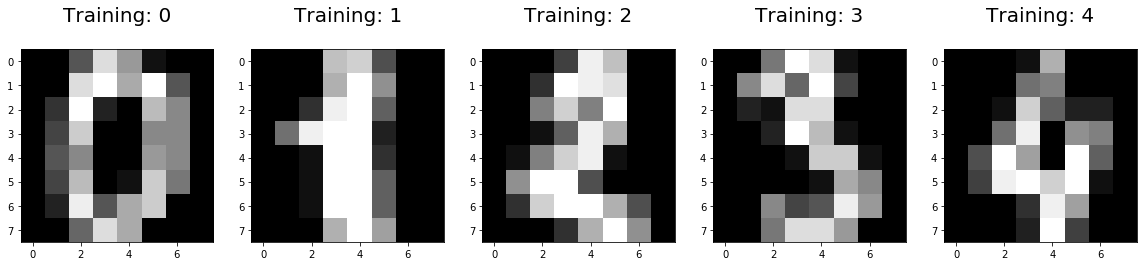

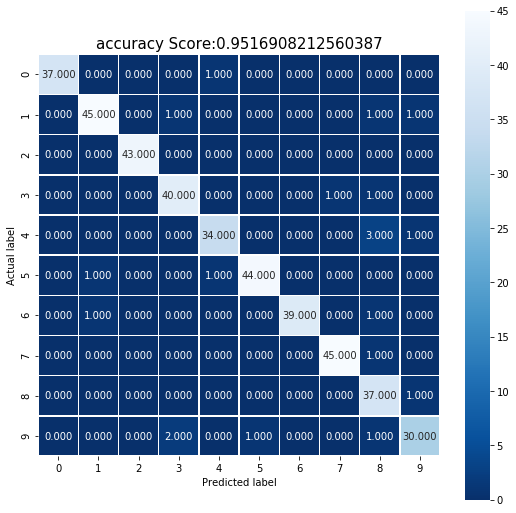

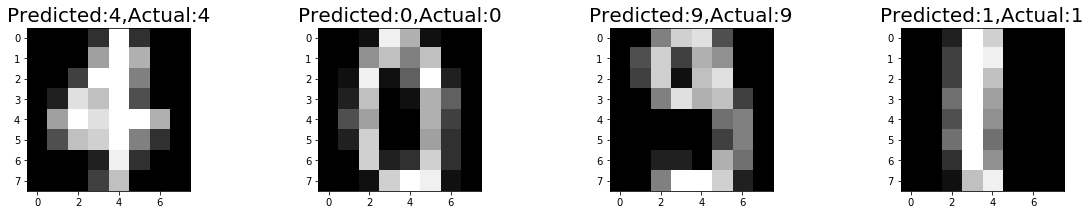

In [1]:
#load libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()
print("Image Data Shape:",digits.data.shape)
print("Label Data Shape:",digits.target.shape)

#displaying some of images
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n"%label,fontsize=20)
    
#divide dataset into Training and Test set
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#import logistic regression model
from sklearn.linear_model import LogisticRegression

#making an instance of model and training it
lr=LogisticRegression()
lr.fit(x_train,y_train)

#predicting output of the first element of the test set
print(lr.predict(x_test[0].reshape(1,-1)))

#predicting output of the first 10 elements of the test set
print(lr.predict(x_test[0:10]))

#predicting entire dataset
predictions=lr.predict(x_test)

#Determining accuracy of the model
score=lr.score(x_test,y_test)
print(score)

#create confussion matrix
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

#Displying confussion matrix in heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15);


#once again see how system works

classifiedIndex=[]  #list holding index having prediction==Label
'''for predict,actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1'
'''
#appending index of data having prediction==y_test(lebel)
for i in range(len(y_test)):
    if predictions[i]==y_test[i]:
            classifiedIndex.append(i)
            
            
'''plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {},Actual: {}".format(predictions[wrong],y_test[wrong]),fontsize=20)'''
    
plt.figure(figsize=(20,3))     #to display image by keeping previous image
#loop to display first 4 images with predicted and original label
for i in range(len(classifiedIndex[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(x_test[classifiedIndex[i]],(8,8)),cmap=plt.cm.gray)  #cmap=plt.cm.gray conver image into gray scale
    plt.title("Predicted:{},Actual:{}".format(predictions[i],y_test[i]),fontsize=20)